In [ ]:
#행정구역별 인구 수(행정구역_2024.xslx파일 필요) 
import pandas as pd #데이터 분석을 위한 패키지 
import warnings
warnings.filterwarnings(action='ignore') #warning 무시하는 패키지

In [399]:
df=pd.read_excel('행정구역_202401.xlsx',skiprows=1) #엑셀파일 불러오기
df.head(1)

,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,51313912,25558944,25754968


In [ ]:
df1=df.copy()
# 데이터 전처리작업(데이터 작업을 쉽게 분석하기 위해 보기쉽게 만드는 작업)
df1.columns=['행정구역2','총인구수','남자인구수','여자인구수'] #기존 columns에서 변경
df1['행정구역1']="" # colum(열)새로 생성 

In [ ]:
#columns 열제목 순서 변경하기
df2=df1.copy()
cols=list(df1.columns) #colums를 list화
df2=df1[[cols[-1]] + cols[0:-1]] #df1[['행정구역1, '행정구역2 ...]] // #list 없이 순서변경 df2=df1.columns[-1].append(df1.columns[:-1])
df2.head()


,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,,전국,51313912,25558944,25754968
1,,서울특별시,9384325,4538354,4845971
2,,종로구,139378,67240,72138
3,,중구,121322,58651,62671
4,,용산구,212175,101793,110382


In [ ]:
#행정구역 1에 특/광/자치/도를 대입하기
sidos=['특별시','광역시','자치시','경기도','남도','북도','자치도']
for i in range(1,len(df2)): # 행 개수-1에서 i를 선택
    for sido in sidos: #sids에서 sido를 뽑음
        if sido in df2.loc[i,'행정구역2']: # 행정구역2 에 sido의 키워드를 가진다면
             df2.loc[i,'행정구역1']=df2.loc[i,'행정구역2'] #행정구역2값을 행정구역1에 복사해 넣음
             df2.loc[i,'행정구역2']='소계' #그리고 행정구역2의 값에는 '소계'를 넣음
df2




,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,,전국,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,,종로구,139378,67240,72138
3,,중구,121322,58651,62671
4,,용산구,212175,101793,110382
...,...,...,...,...,...
288,,거창군,59909,29480,30429
289,,합천군,41096,20094,21002
290,제주특별자치도,소계,674353,337578,336775
291,,제주시,490888,245197,245691


In [ ]:
for i in range(2,len(df2)): # 2는 전국/소계를 제외한 이후를 넣음
    if df2.loc[i,'행정구역1'] =='': #만약 행정구역 1이 공백이라면
        df2.loc[i,'행정구역1']=df2.loc[i-1, '행정구역1'] #행정구역 1의 행위치-1을 기입(이 경우 index2의 경우 1로 인해 서울 특별시가 기입됨, 그러나 이후 다른 시도는 해당이 안되며, 다른 시도 하단의 공백은 조건에 해당되 공백 상단에 있는 다른시도 이름이 기입되게 됨)

df2.loc[0, '행정구역1']='전국' #(0,행정구역1) 위치에 '전국' 표기
df2.loc[0,'행정구역2']='합계'#(0,행정구역2) 위치에 '합계' 표기
df2['행정구역2']=df2['행정구역2'].str.strip() #행정구역2의 양끝 공백을 제거
df2

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,전국,합계,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,서울특별시,종로구,139378,67240,72138
3,서울특별시,중구,121322,58651,62671
4,서울특별시,용산구,212175,101793,110382
...,...,...,...,...,...
288,경상남도,거창군,59909,29480,30429
289,경상남도,합천군,41096,20094,21002
290,제주특별자치도,소계,674353,337578,336775
291,제주특별자치도,제주시,490888,245197,245691


In [ ]:
df2.to_csv('행정구역별 인구수.csv') #다음 내용 저장

In [ ]:
df2=pd.read_csv('행정구역별 인구수.csv', index_col=0)
df2
filt=df2['행정구역2'] =='소계' #행정구역2의 위치면 '소계'를 기입해주는 함수
df3=df2[filt] #df3은 df2에 filt 함수를 적용함
df3



,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
1,서울특별시,소계,9384325,4538354,4845971
27,부산광역시,소계,3290964,1603859,1687105
44,대구광역시,소계,2373844,1166110,1207734
54,인천광역시,소계,3000454,1500414,1500040
68,광주광역시,소계,1418241,700377,717864
74,대전광역시,소계,1441562,719008,722554
80,울산광역시,소계,1103402,567081,536321
86,세종특별자치시,소계,386944,192704,194240
88,경기도,소계,13635250,6857867,6777383
145,강원특별자치도,소계,1526243,767496,758747


In [406]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic') # 폰트 선택ㅇ
plt.rc('font',size=11) #폰트크기 11
plt.rc('axes',unicode_minus=False) #한글 깨짐 방지

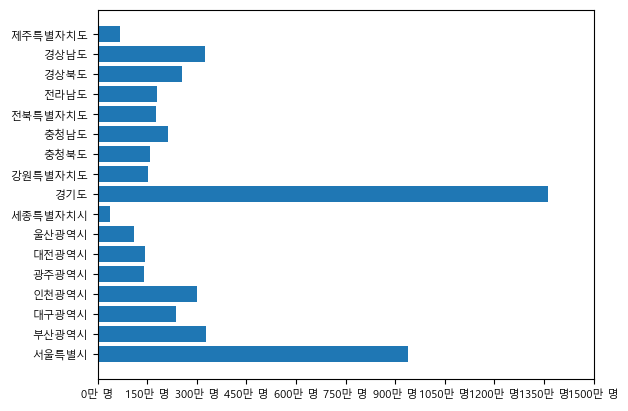

In [ ]:
plt.rc('font',size=8)
plt.barh(df3['행정구역1'], df3['총인구수']/10000) #총인구에서 /10000을 해줌으로 최대 5천만의 숫자가 500대로 보기가 수월해짐
xticks=[x for x in range(0,1501,150)]
plt.xticks(xticks,[f'{x}만 명' for x in xticks])
plt.show()

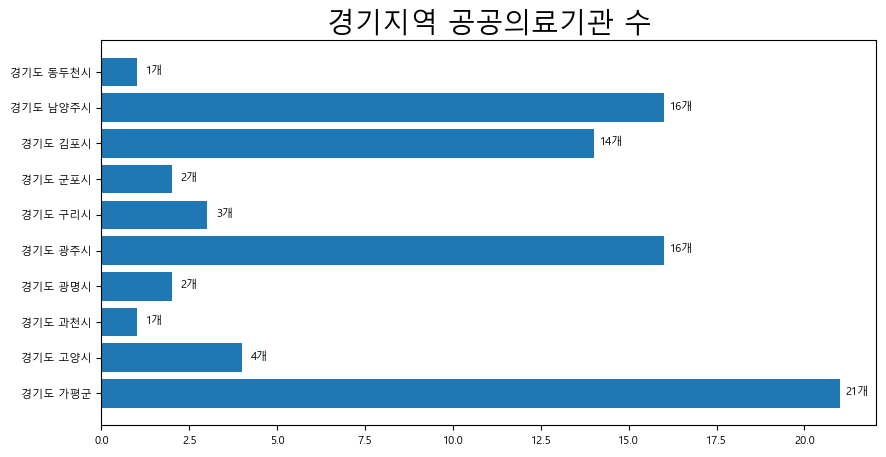

In [430]:
df=pd.read_csv("인구수별공공의료기관수.csv")
word='경기'
filt=df['시도군구'].str.contains(word) # word에 해당하는 단어가 "포함"되면 출력
df=df[filt]
if len(df) > 10:
    df=df[:10]
df[filt]

plt.figure(figsize=(10,5))
plt.barh(df['시도군구'],df['count'])
plt.title(f'{word}지역 공공의료기관 수', size=20)
for idx, count in enumerate(df['count']):
    plt.text(count+0.5, idx-0.05, f'{count}개', ha='center')

plt.show()